# __A brief analysis of correlation between salary and factors that possibly affect it:__

__Целями работы являются:__
 * Узнать, от каких параметров и насколько зависит заработная плата IT-специалистов
 * Ответить на вопросы: 
 > Сколько лет опыта необходимо, чтобы получить ту или иную позицию?
 > В каких отраслях платят больше?
 > В каком возрасте наиболее высокий шанс получить работу?
 > насколько сильно компании поддерживают сотрудников при Covid-19?
 * Сделать предсказание заработной платы на основе нескольких объёмных датасетов для корректной оценки персонала

 __Для этих целей было необходимо:__
 * Почистить датасеты от полей с пропущенными/нерелевантными значениями, по возможности заменяя предсказанными значениями исходя из других параметров
 * Объединить датасеты с зарплатами
 * Построить и обучить модель на готовых данных 

Импортируем библиотеки:

In [515]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import cm
from dash import Dash, html
from tidypython import *
from janitor import clean_names, remove_empty, remove_columns
from skimpy import clean_columns

Reading and briefly discover some datasets

In [516]:
df2020 = pd.read_csv('IT Salary Survey EU_2020.csv')
df2018 = pd.read_csv('IT Salary Survey EU 2018.csv')
df2019 = pd.read_csv('T Salary Survey EU 2019.csv')
df2018.info()
df2019.info()
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           765 non-null    object 
 1   Age                                 672 non-null    float64
 2   Gender                              751 non-null    object 
 3   City                                736 non-null    object 
 4   Position                            737 non-null    object 
 5   Years of experience                 732 non-null    float64
 6   Your level                          743 non-null    object 
 7   Current Salary                      750 non-null    float64
 8   Salary one year ago                 596 non-null    float64
 9   Salary two years ago                463 non-null    float64
 10  Are you getting any Stock Options?  742 non-null    object 
 11  Main language at work               750 non-n

Напишем несколько функций, которые пригодятся на протяжении всего проекта:

In [517]:
def cleand(src_df):
    
    if 'Yearly stocks' in src_df.columns:
        cleand = src_df.assign(net_salary=lambda x: x['Yearly brutto salary (without bonus and stocks)'] + x['Yearly bonus'] + x['Yearly stocks'])
    else:
        cleand = src_df.assign(net_salary=lambda x: x['Yearly brutto salary (without bonus and stocks) in EUR'] + x['Yearly bonus + stocks in EUR'])
    
    return cleand     

def trunc_nan(src_df):
    truncated = src_df.apply(lambda x: pd.Series(x.dropna().values))
    truncated = src_df.fillna(0)
    return truncated

def clean_colum(src_df):
    src_df = clean_columns(src_df, case='snake', replace={
        'Are you getting any Stock Options?':'Stocks',
        'Zeitstempel':'Timestamp',
        'Your level':'Seniority level',
        'Position (without seniority)':'Position',
        'Total years of experience':'Years of experience'})
    return src_df


Задекорируем их, чтобы запустить поочерёдно

In [518]:
'''
def execute_in_seq(func_list):
    def decorator(src_df):
        for func in func_list:
            src_df = func(src_df)
        return src_df
    return decorator

def cleand(src_df):
    #cleand = src_df[src_df.salary>0]
    #cleand['Age'] = src_df.fillna(src_df.groupby('experience'))
    if 'Yearly stocks' in src_df.columns:
        cleand = src_df.assign(new_col=lambda x: x['Yearly brutto salary (without bonus and stocks)'] + x['Yearly bonus'] + x['Yearly stocks'])
    else:
        cleand = src_df.assign(new_col=lambda x: x['Yearly brutto salary (without bonus and stocks) in EUR'] + x['Yearly bonus + stocks in EUR'])


    return cleand     

def trunc_nan(src_df):
    truncated = src_df.apply(lambda x: pd.Series(x.dropna().values))
    truncated = src_df.fillna(0)
    return truncated

def clean_colum(src_df):
    src_df = clean_columns(src_df, case='snake', replace={
        'Are you getting any Stock Options?':'Stocks',
        'Zeitstempel':'Timestamp',
        'Your level':'Seniority level',
        'Position (without seniority)':'Position',
        'Total years of experience':'Years of experience'})
    return src_df


@execute_in_seq([clean_colum, cleand, trunc_nan])
def process_data(src_df):
    src_df = src_df.drop(['Yearly bonus one year ago. Only answer if staying in same country', 
            'Yearly stocks one year ago. Only answer if staying in same country',
            'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
            'Number of vacation days',
            'Company name ',
            'Сontract duration',
            '0'],
            axis=1, inplace=True)
    
    return src_df



processed_df = process_data(df2019)
'''

"\ndef execute_in_seq(func_list):\n    def decorator(src_df):\n        for func in func_list:\n            src_df = func(src_df)\n        return src_df\n    return decorator\n\ndef cleand(src_df):\n    #cleand = src_df[src_df.salary>0]\n    #cleand['Age'] = src_df.fillna(src_df.groupby('experience'))\n    if 'Yearly stocks' in src_df.columns:\n        cleand = src_df.assign(new_col=lambda x: x['Yearly brutto salary (without bonus and stocks)'] + x['Yearly bonus'] + x['Yearly stocks'])\n    else:\n        cleand = src_df.assign(new_col=lambda x: x['Yearly brutto salary (without bonus and stocks) in EUR'] + x['Yearly bonus + stocks in EUR'])\n\n\n    return cleand     \n\ndef trunc_nan(src_df):\n    truncated = src_df.apply(lambda x: pd.Series(x.dropna().values))\n    truncated = src_df.fillna(0)\n    return truncated\n\ndef clean_colum(src_df):\n    src_df = clean_columns(src_df, case='snake', replace={\n        'Are you getting any Stock Options?':'Stocks',\n        'Zeitstempel':'Time

Необходимо почистиь датасеты от малорелевантных значений 

In [519]:

df2019.drop(['Yearly bonus one year ago. Only answer if staying in same country', 
            'Yearly stocks one year ago. Only answer if staying in same country',
            'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
            'Number of vacation days',
            'Company name ',
            'Сontract duration',
            '0'],
            axis=1, inplace=True)

df2020.drop([
            'Employment status',
            'Years of experience in Germany',
            'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
            'Annual bonus+stocks one year ago. Only answer if staying in same country',
            'Number of vacation days',
            'Сontract duration',
            'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
            'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'],
            axis=1, inplace=True)
#  df2020['Age'] = df2020.fillna(df2020.groupby('exper'))



In [520]:
s = cleand(df2019)
a = clean_colum(s)
cleaneddf_2019 = trunc_nan(a)
cleaneddf_2019.tail(20)

16 column names have been cleaned

,timestamp,age,gender,city,seniority_level,position_without_seniority,years_of_experience,your_main_technology_programming_language,yearly_brutto_salary_without_bonus_and_stocks,yearly_bonus,yearly_stocks,number_of_home_office_days_per_month,main_language_at_work,company_size,company_type,company_business_sector,net_salary
971,01.01.2020 16:52:48,0.0,Male,Berlin,Senior,Backend Developer,7,Java,70000.0,0.0,0.0,4.0,Deutsch,100-1000,Consulting / Agency,IT,70000.0
972,02.01.2020 08:48:00,34.0,Male,Cologne,Senior,Desktop,13,C/C++,70000.0,0.0,0.0,0.0,English,50-100,Product,Manufacture,0.0
973,02.01.2020 14:56:25,29.0,Male,Berlin,Middle,QA,7,Not Relevant,42000.0,3000.0,0.0,4.0,English,100-1000,Consulting / Agency,0,0.0
974,02.01.2020 20:21:33,33.0,Female,Berlin,Junior,Business Analyst,1,PostgreSQL,32000.0,0.0,0.0,2.0,English,1000+,Startup,Finance / Insurance,32000.0
975,03.01.2020 09:54:07,31.0,Male,Munich,0,DevOps,8,AWS,80000.0,0.0,0.0,0.0,English,0,0,0,0.0
976,03.01.2020 11:40:59,37.0,Male,Utrecht,Middle,Product manager,17,Java,71000.0,0.0,0.0,0.0,English,100-1000,Product,Finance / Insurance,71000.0
977,03.01.2020 15:01:40,26.0,Female,Amsterdam,Middle,Backend Developer,4,Java,52800.0,0.0,0.0,4.0,English,1000+,Bank,Finance / Insurance,0.0
978,03.01.2020 19:02:44,33.0,Male,Amsterdam,Senior,Frontend Developer,10,Javascript / Typescript,87000.0,0.0,50000.0,5.0,English,1000+,Product,Сommerce,0.0
979,04.01.2020 14:45:55,28.0,Male,Moscow,Lead,Frontend Developer,5,Javascript / Typescript,54000.0,10000.0,0.0,365.0,Russian,100-1000,Product,Security,64000.0
980,04.01.2020 15:50:54,27.0,Male,Berlin,Senior,Data Scientist,5,SAS,73300.0,1500.0,0.0,0.0,English,1000+,Consulting / Agency,Health,0.0


In [521]:
cleaneddf_2019.dtypes
cleaneddf_2019['net_salary']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
        ...   
986    74000.0
987    72000.0
988        0.0
989        0.0
990        0.0
Name: net_salary, Length: 991, dtype: float64

Основные характеристики численных значений датасета:

In [522]:
cleaneddf_2019.describe()

,age,years_of_experience,yearly_brutto_salary_without_bonus_and_stocks,yearly_bonus,yearly_stocks,number_of_home_office_days_per_month,net_salary
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,28.850656,8.529768,72488.990918,4202.119072,3741.083068,4.166751,17294.278729
std,11.296638,5.036320,24046.014066,8502.367954,28529.384244,12.732029,44028.915908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,5.000000,60000.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,8.000000,70000.000000,0.000000,0.000000,2.000000,0.000000
75%,35.000000,11.000000,80000.000000,5000.000000,0.000000,5.000000,0.000000
max,54.000000,30.000000,216000.000000,80000.000000,750000.000000,365.000000,293000.000000


In [523]:
for i in cleaneddf_2019.columns:
    print(
        i,
        '\n',cleaneddf_2019[i].unique(),
        '\n','^'*40
    )

timestamp 
 ['02.12.2019 11:18:26' '02.12.2019 11:18:35' '02.12.2019 11:18:56'
 '02.12.2019 11:19:08' '02.12.2019 11:19:37' '02.12.2019 11:20:30'
 '02.12.2019 11:21:26' '02.12.2019 11:21:31' '02.12.2019 11:21:38'
 '02.12.2019 11:21:52' '02.12.2019 11:21:55' '02.12.2019 11:22:36'
 '02.12.2019 11:22:43' '02.12.2019 11:23:23' '02.12.2019 11:23:31'
 '02.12.2019 11:24:20' '02.12.2019 11:24:53' '02.12.2019 11:24:54'
 '02.12.2019 11:25:24' '02.12.2019 11:25:36' '02.12.2019 11:25:49'
 '02.12.2019 11:26:09' '02.12.2019 11:27:04' '02.12.2019 11:27:41'
 '02.12.2019 11:30:24' '02.12.2019 11:30:34' '02.12.2019 11:31:32'
 '02.12.2019 11:31:55' '02.12.2019 11:32:46' '02.12.2019 11:32:52'
 '02.12.2019 11:32:59' '02.12.2019 11:36:20' '02.12.2019 11:37:44'
 '02.12.2019 11:37:53' '02.12.2019 11:39:53' '02.12.2019 11:41:59'
 '02.12.2019 11:44:10' '02.12.2019 11:45:24' '02.12.2019 11:45:54'
 '02.12.2019 11:46:17' '02.12.2019 11:46:58' '02.12.2019 11:48:35'
 '02.12.2019 11:49:02' '02.12.2019 11:49:03' '02.1

In [524]:
grouped_df2019 = df2019.groupby(['Main language at work'])['Main language at work'].count()
grouped_df2019

langs = {
    'Deutch':'German',
    'Deutch/Englisch':'German',
    'Team - Russian; Cross-team - English':'English'
}

for lang in langs:
    cleaneddf_2019['main_language_at_work'] = cleaneddf_2019['main_language_at_work'].apply(lambda x:langs.get(lang) if (x==lang) else x )


In [525]:
merged_df = pd.merge_ordered


Plotting

<AxesSubplot: xlabel='company_size'>

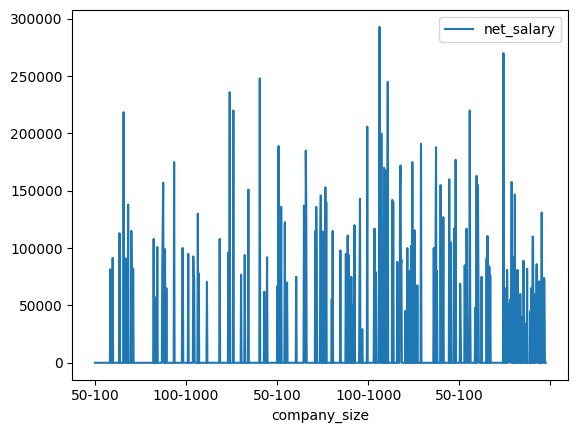

In [526]:
cleaneddf_2019.plot(x='company_size', y='net_salary')

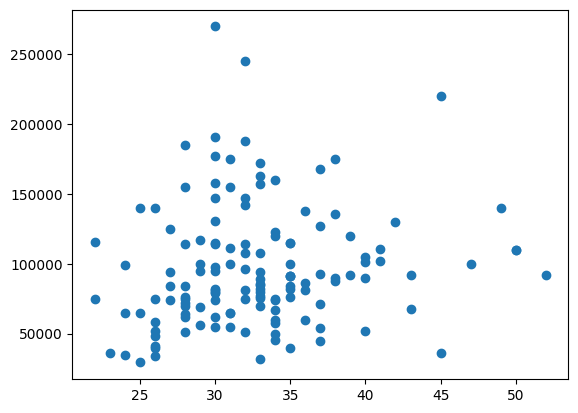

In [527]:
cleaneddf_2019.replace(0, np.nan, inplace=True)
plt.scatter(cleaneddf_2019['age'], cleaneddf_2019['net_salary'])